<a href="https://colab.research.google.com/github/GuillermoSainz07/Manim-Animaciones/blob/main/Gaussian_Manim_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from manim import *

Manim Community v0.17.3

# Gaussian plot with manim

Univariate Gaussian Distribution

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%%manim -qh -v WARNING Gaussian2D

class Gaussian2D(Scene):
    def construct(self):
        k = ValueTracker(0)
        p = ValueTracker(1)

        x = np.linspace(-6,6,100)

        axes = Axes(x_range=(-6,6),
                   y_range=(0,0.9)).add_coordinates().scale(0.7)

        density = always_redraw(lambda:
                              axes.plot_line_graph(x,
                                                  st.norm.pdf(x,
                                                             loc=k.get_value(),
                                                             scale=p.get_value()),
                                                  add_vertex_dots=False,
                                                  stroke_width=10,
                                                  line_color=BLUE))

        sigma = MathTex('\sigma = ').to_edge(UL, buff=2).set_color(YELLOW)
        mu = MathTex('\mu = ').to_edge(UR, buff=2).set_color(YELLOW)
        texto = Text('Distribucion Gaussiana Univariable').to_edge(UP, buff=0.5).scale(0.7)

        mu_n = always_redraw(lambda: DecimalNumber(k.get_value()).next_to(mu))
        sigma_n = always_redraw(lambda: DecimalNumber(p.get_value()).next_to(sigma))

        self.add(axes)
        self.play(FadeIn(VGroup(sigma,mu, mu_n, sigma_n, texto)))
        self.play(Create(density), run_time=4)
        self.wait()

        self.wait()
        self.play(k.animate.set_value(2))
        self.wait()
        self.play(k.animate.set_value(-2))
        self.wait()
        self.play(k.animate.set_value(0))
        self.wait()

        self.play(p.animate.set_value(2))
        self.wait()
        self.play(p.animate.set_value(0.5))
        self.wait()
        self.play(p.animate.set_value(1))
        self.wait()


Multivariate Gaussian Distribution

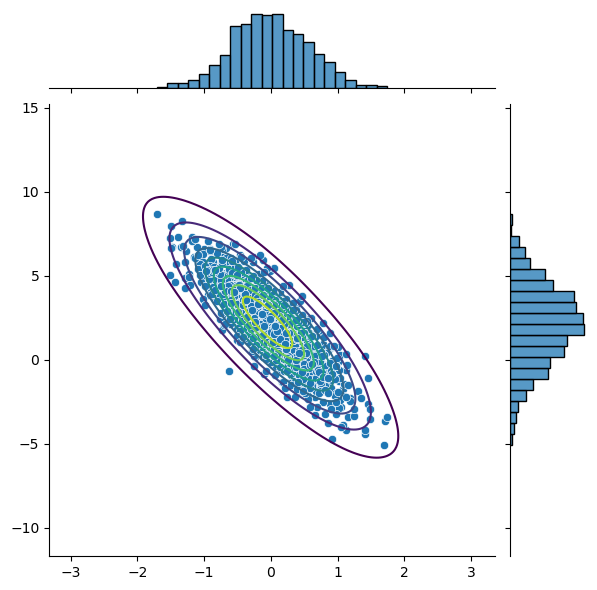

In [ ]:
cov = np.array([[0.3,-1],
                [-1,5]])

pts = np.random.multivariate_normal([0,2], cov, size=1000)

sns.jointplot(x=pts[:,0], y=pts[:,1]).plot_joint(sns.kdeplot, cmap='viridis', bw_adjust=3)
plt.show()

In [ ]:
%%manim -qm -v WARNING Gaussian3D

class Gaussian3D(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes(x_range=(-4,4),
                         y_range=(-3,3),
                         z_range=(0,0.2))

        def density(u,v):
            x, y = np.meshgrid(u,v)
            pos = np.dstack((x,y))
            z = st.multivariate_normal([0, 0], [[1.0, 0.3], [0.3, 1.0]]).pdf(pos)
            return z

        surface = Surface(lambda u,v: axes.c2p(u,v, density(u,v)),
                          u_range=[-4,4],
                          v_range=[-3,3],
                          fill_opacity=0.7)

        self.set_camera_orientation(
            phi=75*DEGREES,
            theta=-70*DEGREES,
            frame_center=[0, 0, 2],
            zoom=0.75)


        surface.set_fill_by_value(axes=axes, colorscale=[(PURPLE_E, 0), (GREEN_E, 0.1), (YELLOW, 0.17)], axis=2)

        self.add(axes)
        self.play(Create(surface))
        self.wait()
        self.move_camera(theta=70*DEGREES, run_time=2)
        self.move_camera(theta=-70*DEGREES, run_time=2)
        self.wait()

        self.move_camera(
            theta=-90*DEGREES,
            phi=0,
            frame_center=[0, 0, 0],
            zoom=0.5
        )
        self.wait()

Animacion de Distribucion Normal Multivariante con cambio de parametro $\mu$

In [ ]:
%%manim -qm -v WARNING ChangeMu

class ChangeMu(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes(x_range=(-5,5),
                         y_range=(-5,5),
                         z_range=(0,0.2))

        # Elementos para la matriz mu
        m_1 = ValueTracker(0)
        m_2 = ValueTracker(0)


        # Elementos para la matriz de varianza covarianza sigma
        c_11 = ValueTracker(1)
        c_12 = ValueTracker(0)
        c_21 = ValueTracker(0)
        c_22 = ValueTracker(1)

        def density(u,v):
            x,y = np.meshgrid(u,v)
            matrix = np.dstack((x,y))
            z = st.multivariate_normal(
                mean=np.array([m_1.get_value(),
                                m_2.get_value()]),
                cov=np.array([[c_11.get_value(),c_12.get_value()],
                             [c_21.get_value(), c_22.get_value()]])).pdf(matrix)
            return z

        surface =  always_redraw(lambda: Surface(lambda u,v:
                          axes.c2p(u,v,density(u,v)),
                                  u_range=(-5,5),
                                  v_range=(-5,5),
                                  fill_opacity=0.7).set_fill_by_value(axes=axes,
                                                                      colorscale=[(PURPLE_E, 0),
                                                                                  (GREEN_E, 0.1),
                                                                                  (YELLOW, 0.17)], axis=2))
        mu_1 = MathTex('\mu_1 = ').set_color(YELLOW).to_edge(UR, buff=0.2)
        mu_2 = MathTex('\mu_2 = ').set_color(YELLOW).to_edge(UL, buff=0.2)

        mu_1_n = always_redraw(lambda: DecimalNumber(m_1.get_value()).next_to(mu_1))
        mu_2_n = always_redraw(lambda: DecimalNumber(m_2.get_value()).next_to(mu_2))

        valores_mu = VGroup(mu_1,mu_2, mu_1_n, mu_2_n)

        x_axis = axes.get_x_axis_label(MathTex('x'))
        y_label = axes.get_y_axis_label(MathTex('y'))
        z_label = axes.get_z_axis_label(MathTex('f(x,y)'))

        axis_labels = VGroup(x_axis,y_label,z_label)

        self.set_camera_orientation(
            phi=75*DEGREES,
            theta=-70*DEGREES,
            frame_center=[0, 0, 2],
            zoom=0.75)

        self.play(Create((axes)))
        self.play(Create(valores_mu))
        self.add(axis_labels)
        self.play(Create(surface))
        self.wait()

        self.play(m_1.animate.set_value(2))
        self.play(m_1.animate.set_value(-2))
        self.play(m_1.animate.set_value(0))

        self.move_camera(
            theta=-90*DEGREES,
            phi=0,
            frame_center=[0, 0, 0],
            zoom=0.5
        )

        self.wait()
        self.play(m_1.animate.set_value(2))
        self.play(m_1.animate.set_value(-2))
        self.play(m_1.animate.set_value(0))

        self.move_camera(
            phi=75*DEGREES,
            theta=-70*DEGREES,
            frame_center=[0, 0, 2],
            zoom=0.75)

        self.wait()
        self.play(m_2.animate.set_value(2))
        self.play(m_2.animate.set_value(-2))
        self.play(m_2.animate.set_value(0))

        self.move_camera(
            theta=-90*DEGREES,
            phi=0,
            frame_center=[0, 0, 0],
            zoom=0.5
        )

        self.wait()
        self.play(m_2.animate.set_value(2))
        self.play(m_2.animate.set_value(-2))
        self.play(m_2.animate.set_value(0))
        self.wait()

        self.move_camera(
            phi=75*DEGREES,
            theta=-70*DEGREES,
            frame_center=[0, 0, 2],
            zoom=0.75)

        self.wait()

        self.move_camera(
            theta=-90*DEGREES,
            phi=0,
            frame_center=[0, 0, 0],
            zoom=0.5
        )

        self.wait()
        self.play(m_1.animate.set_value(2))
        self.play(m_2.animate.set_value(2))

        self.wait()
        self.play(m_1.animate.set_value(-2))
        self.play(m_2.animate.set_value(-2))


        self.wait()
        self.play(m_1.animate.set_value(0))
        self.play(m_2.animate.set_value(0))
        self.wait()

        self.move_camera(
            phi=75*DEGREES,
            theta=-70*DEGREES,
            frame_center=[0, 0, 2],
            zoom=0.75)

        self.wait()



Distribucion Normal Multivariante Cambio de elementos de matriz $\Sigma$ elementos varianza

In [ ]:
%%manim -qm -v WARNING ChangeVariance

class ChangeVariance(ThreeDScene):
    def construct(self):

        axes = ThreeDAxes(x_range=(-5,5),
                         y_range=(-5,5),
                         z_range=(0,0.8))


        mu = np.array([0,0])

        s11 = ValueTracker(1)
        s12 = ValueTracker(0)
        s21 = ValueTracker(0)
        s22 = ValueTracker(1)

        def density(u,v):
            x,y = np.meshgrid(u,v)
            t = np.dstack((x,y))

            z = st.multivariate_normal(mean=np.array([0,0]),
                                       cov=np.array([[s11.get_value(),s12.get_value()],
                                                    [s21.get_value(),s22.get_value()]])).pdf(t)
            return z

        surface = always_redraw(lambda:
                                Surface(lambda u,v: axes.c2p(u,v, density(u,v)),
                         u_range=[-5,5],
                         v_range=[-5,5],
                         fill_opacity=0.7).set_fill_by_value(axes=axes,
                                                             colorscale=[(PURPLE_E, 0),
                                                                         (GREEN_E, 0.1),
                                                                         (YELLOW, 0.17)],
                                                             axis=2))
        sigma_11 = (MathTex('\sigma^2 = ')
                    .set_color(YELLOW)
                    .to_edge(UL, buff=0.2)
                   )

        sigma_22 = (MathTex('\sigma^2 = ')
                    .set_color(YELLOW)
                    .to_edge(UR, buff=0.2)
                   )

        variance_1 = always_redraw(lambda: DecimalNumber(s11.get_value()).next_to(sigma_11))
        variance_2 = always_redraw(lambda: DecimalNumber(s22.get_value()).next_to(sigma_22))

        values_sigma = VGroup(sigma_11, variance_1,
                             sigma_22, variance_2)

        x_label = axes.get_x_axis_label(MathTex('x'))
        y_label = axes.get_y_axis_label(MathTex('y'))
        z_label = axes.get_z_axis_label(MathTex('f(x,y)'))

        labels_axes = VGroup(x_label,
                             y_label,
                             z_label)


        self.set_camera_orientation(
            phi=75*DEGREES,
            theta=-70*DEGREES,
            frame_center=[0, 0, 2],
            zoom=0.75)

        self.play(Create(axes),
                  Create(values_sigma),
                  Create(labels_axes))

        self.play(Create(surface))
        self.wait()

        #Modificacion de sigma 11

        self.play(s11.animate.set_value(2))
        self.wait()
        self.play(s11.animate.set_value(0.5))
        self.wait()
        self.play(s11.animate.set_value(1))
        self.wait()

        self.move_camera(
            theta=-90*DEGREES,
            phi=0,
            frame_center=[0, 0, 0],
            zoom=0.5
        )

        self.play(s11.animate.set_value(2))
        self.wait()
        self.play(s11.animate.set_value(0.5))
        self.wait()
        self.play(s11.animate.set_value(1))
        self.wait()

        #Modificacion de sigma 22

        self.move_camera(
            phi=75*DEGREES,
            theta=-70*DEGREES,
            frame_center=[0, 0, 2],
            zoom=0.75)

        self.wait()

        self.play(s22.animate.set_value(2))
        self.wait()
        self.play(s22.animate.set_value(0.5))
        self.wait()
        self.play(s22.animate.set_value(1))
        self.wait()

        self.move_camera(
            theta=-90*DEGREES,
            phi=0,
            frame_center=[0, 0, 0],
            zoom=0.5
        )

        self.play(s22.animate.set_value(2))
        self.wait()
        self.play(s22.animate.set_value(0.5))
        self.wait()
        self.play(s22.animate.set_value(1))
        self.wait()

        #Modificacion de ambas varianzas

        self.move_camera(
            phi=75*DEGREES,
            theta=-70*DEGREES,
            frame_center=[0, 0, 2],
            zoom=0.75)

        self.wait()

        self.play(s11.animate.set_value(2))
        self.play(s22.animate.set_value(2))
        self.wait()
        self.play(s11.animate.set_value(0.5))
        self.play(s22.animate.set_value(0.5))
        self.wait()
        self.play(s11.animate.set_value(1))
        self.play(s22.animate.set_value(1))

        self.wait()

        self.move_camera(
            theta=-90*DEGREES,
            phi=0,
            frame_center=[0, 0, 0],
            zoom=0.5
        )

        self.wait()

        self.play(s11.animate.set_value(2))
        self.play(s22.animate.set_value(2))
        self.wait()
        self.play(s11.animate.set_value(0.5))
        self.play(s22.animate.set_value(0.5))
        self.wait()
        self.play(s11.animate.set_value(1))
        self.play(s22.animate.set_value(1))

        self.wait()

        self.move_camera(
            phi=75*DEGREES,
            theta=-70*DEGREES,
            frame_center=[0, 0, 2],
            zoom=0.75)

        self.wait()